## Overview Questions

1. Has network latency gone up since we switched internet service providers?

Ho: There has been no change in latency between pre and post switch timeframes

Ha: there is a statistically significant mean increase in latency between pre and post switch timeframes

T1: There is no population difference, but our post switch sample is non-representative higher than the pre switch sample

T2: There is a population difference, but out post switch sample is non-representative the same as the pre switch sample

True +: There is a population difference and our post switch sample is statistically significantly higher than the pre switch sample

True -: There is no population difference and our post switch sample is not statistically significantly higher than the pre switch sample

2. Is the website redesign any good? 

Ho: There is no increase in visitors to the website since redesign

Ha: There is an increase in visitors since the redesign

T1: There is no population difference, but there was a non-representational sample showing increase post design

T2: There is a population difference, but there is a non-representational sample showing no increase post design

True +: There is a population difference and there is a representative sample showing increase post redesign

True -: There is no population difference and there is a representative sample showing no increase post design

3. Is our television ad driving more sales? 

Ho: There is no increase in sales between pre and post ad timeframes

Ha: There is an increase in sales between pre and post ad timeframes

T1: There is no population difference, but there was a non-representative sample showing an increase in sales from pre to post ad timeframes

T2: There is a population difference, but there was a non-representative sample showing no increase in sales from pre to post ad timeframes

True +: There is a population difference and a representative sample shows increase post ad

True -: There is no population difference and a representative sample shows no increase post ad

## Comparison of Means

1. Which type of test to do in the following?

a. difference between grades of students on 2nd floor vs all students?

single sample t test, 2 tailed

b. adults who drink milk taller than adults who don't? 

2 sample t test, 1 tail

c. price of gas higher in Texas or New Mexico?

2 sample t test, 1 tail

d. stress levels different between students of data science, web development, cloud academy?

ANOVA

2. Is average time it takes to sell homes different between 2 offices? 40 sales from office 1 with mean of 90 days and SD of 15 days. 50 sales from 2nd office with mean of 100 days and SD of 20 days. Yes, they're statistically significantly different

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns


alpha = .05



In [39]:
office_1_dist = np.random.normal(90, 15, (40))
office_2_dist = np.random.normal(100,20,(50))

t, p = stats.ttest_ind(office_1_dist, office_2_dist, equal_var=True)

In [38]:
stat, p_val = stats.levene(office_1_dist, office_2_dist)
stat, p_val

(2.012369438618965, 0.1595534220330537)

In [40]:
t, p

(-2.7357323560430333, 0.007527726898761443)

3. Load mpg dataset and use it for following questions

In [2]:
from pydataset import data
df_mpg = data('mpg')
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


a. Is there a difference in fuel-efficieny between cars from 2008 vs 1999? Cannot reject Ho

In [3]:
df_mpg['average_mpg'] = (df_mpg.cty + df_mpg.hwy) //2

df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22


In [21]:
o_eight_mpg = df_mpg[df_mpg.year == 1999].average_mpg
print(o_eight_mpg)

nine_nine_mpg = df_mpg[df_mpg.year == 2008].average_mpg
print(nine_nine_mpg)

1      23
2      25
5      21
6      22
8      22
9      20
12     20
13     21
16     19
22     15
24     21
25     19
31     13
32     15
33     23
35     22
38     21
39     20
40     19
41     19
45     18
46     18
51     15
52     15
56     14
57     13
58     15
62     13
64     13
71     13
72     13
74     13
75     14
76     14
78     15
79     17
80     15
83     15
84     15
85     15
86     14
87     14
89     13
91     22
92     21
95     18
96     18
100    30
101    28
102    28
103    26
104    28
109    22
110    22
113    22
114    22
116    22
117    24
125    17
126    15
131    13
134    13
135    14
136    13
138    15
141    15
142    25
143    23
148    22
149    22
151    15
152    16
155    22
156    21
157    22
160    21
161    21
166    23
167    22
168    22
169    22
174    17
175    18
176    17
177    16
180    25
181    24
184    22
185    22
187    24
188    25
191    22
192    22
194    27
195    28
196    30
199    13
201    17
202    18
204    16


In [22]:
t, p = stats.ttest_ind(o_eight_mpg, nine_nine_mpg)
t,p

(0.29755312837633463, 0.7663105232760251)

b. Are compact cars more fuel efficient than the average car? We reject Ho

In [4]:
df_mpg.rename(columns={'class': 'car_class'})

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22


AttributeError: 'DataFrame' object has no attribute 'car_class'

In [17]:
average_car = df_mpg.average_mpg.mean()
print(average_car)




compact_car = df_mpg[df_mpg['class'] == 'compact'].average_mpg
print(compact_car)

19.935897435897434
1      23
2      25
3      25
4      25
5      21
6      22
7      22
8      22
9      20
10     24
11     23
12     20
13     21
14     21
15     20
142    25
143    23
170    22
171    23
172    22
173    23
187    24
188    25
189    26
190    26
191    22
192    22
193    22
194    27
195    28
196    30
197    32
198    30
208    25
209    22
210    25
211    25
212    20
213    38
214    25
215    22
216    25
217    25
218    25
219    25
220    19
221    20
Name: average_mpg, dtype: int64


In [20]:
t, p = stats.ttest_1samp(compact_car, average_car)
t, p/2


(7.979482464255871, 1.5854124290527813e-10)

c. Do manual cars get better gas mileage than automatic cars? 

In [25]:
df_mpg['is_automatic'] = np.where(df_mpg['trans'].str.contains('auto'), 'True', 'False')
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22,False


In [27]:
automatic = df_mpg[df_mpg.is_automatic == 'True'].average_mpg
print(automatic)

manual = df_mpg[df_mpg.is_automatic == 'False'].average_mpg
print(manual)

1      23
4      25
5      21
7      22
9      20
11     23
12     20
14     21
16     19
17     21
18     19
19     17
20     13
21     17
22     15
23     14
25     19
27     20
29     16
30     12
31     13
32     15
33     23
34     26
35     22
36     23
37     21
38     21
39     20
40     19
41     19
42     20
43     20
44     14
45     18
46     18
47     19
48     19
50     16
51     15
53     16
54     16
55     10
57     13
58     15
59     15
60     10
61     15
62     13
63     15
64     13
66     10
67     15
68     15
71     13
73     15
74     13
75     14
76     14
77     15
78     15
80     15
81     16
82     16
83     15
84     15
87     14
88     15
89     13
90     15
92     21
94     20
95     18
98     18
101    28
104    28
106    30
107    30
109    22
111    25
113    22
115    23
116    22
119    23
120    20
123    19
124    17
125    17
126    15
127    10
128    16
129    15
130    12
131    13
132    15
133    15
134    13
135    14
136    13
137    15


In [33]:
t, p = stats.ttest_ind(manual, automatic)
t,p/2

(4.661893306345135, 2.6436155071617257e-06)

## Correlation

1. Which stats test should be used, assuming normal distribution?

a. relationship between length of arm and length of foot? 

Pearson's R

b. do males and females quit jobs at the same rate?

Chi square

c. does length of time for lecture correlate with student grade?

Pearson's R

2. use telco_churn data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

alpha = .05

In [24]:
from env import get_db_url

url = get_db_url('telco_churn')



df_telco = pd.read_sql('SELECT * FROM customers', url)

df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


a. Does tenure correlate with monthly charges? Ho = no

In [10]:
tenure_col = df_telco.tenure

charges = df_telco.monthly_charges


In [49]:
r, p = stats.pearsonr(tenure_col, charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

b. Total charges? Ho = no

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_16389/2407075779.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  tenure_col = df_telco.dropna(['monthly_charges'])


TypeError: unhashable type: 'list'

In [14]:
df_telco = df_telco[df_telco.total_charges != ""]

df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [19]:
tot_charges = df_telco.total_charges.astype('float')

tenure_col = df_telco.tenure
tot_charges.head(), tenure_col.head()

(0     593.30
 1     542.40
 2     280.85
 3    1237.85
 4     267.40
 Name: total_charges, dtype: float64,
 0     9
 1     9
 2     4
 3    13
 4     3
 Name: tenure, dtype: int64)

In [20]:
r, p = stats.pearsonr(tenure_col, tot_charges)
r, p

(0.8258804609332071, 0.0)

c. what happens when we control for phone and internet service?

In [26]:
phone_yes = df_telco[df_telco.phone_service == 'Yes']
phone_no = df_telco[df_telco.phone_service == 'No']
phone_yes.head(), phone_no.head()

(  customer_id  gender  senior_citizen partner dependents  tenure  \
 0  0002-ORFBO  Female               0     Yes        Yes       9   
 1  0003-MKNFE    Male               0      No         No       9   
 2  0004-TLHLJ    Male               0      No         No       4   
 3  0011-IGKFF    Male               1     Yes         No      13   
 4  0013-EXCHZ  Female               1     Yes         No       3   
 
   phone_service multiple_lines  internet_service_type_id online_security  ...  \
 0           Yes             No                         1              No  ...   
 1           Yes            Yes                         1              No  ...   
 2           Yes             No                         2              No  ...   
 3           Yes             No                         2              No  ...   
 4           Yes             No                         2              No  ...   
 
   device_protection tech_support streaming_tv streaming_movies  \
 0                No   

In [33]:
internet_yes = df_telco[df_telco.internet_service_type_id == 1]
internet_no = df_telco[df_telco.internet_service_type_id == 2]
internet_yes.head(), internet_no.head()

(  customer_id  gender  senior_citizen partner dependents  tenure  \
 0  0002-ORFBO  Female               0     Yes        Yes       9   
 1  0003-MKNFE    Male               0      No         No       9   
 5  0013-MHZWF  Female               0      No        Yes       9   
 8  0015-UOCOJ  Female               1      No         No       7   
 9  0016-QLJIS  Female               0     Yes        Yes      65   
 
   phone_service multiple_lines  internet_service_type_id online_security  ...  \
 0           Yes             No                         1              No  ...   
 1           Yes            Yes                         1              No  ...   
 5           Yes             No                         1              No  ...   
 8           Yes             No                         1             Yes  ...   
 9           Yes            Yes                         1             Yes  ...   
 
   device_protection tech_support streaming_tv streaming_movies  \
 0                No   

In [28]:
r, p = stats.pearsonr(phone_yes.tenure, phone_yes.monthly_charges)
r,p

(0.24538898585363147, 7.117871077934896e-88)

In [31]:
r, p = stats.pearsonr(phone_no.tenure, phone_no.monthly_charges)
r,p


(0.5857597986661369, 4.6033703473420516e-64)

In [34]:
r, p = stats.pearsonr(internet_yes.tenure, internet_yes.monthly_charges)
r,p

(0.5172828196602499, 8.360426862271327e-166)

In [35]:
r, p = stats.pearsonr(internet_no.tenure, internet_no.monthly_charges)
r,p

(0.6246206176175593, 0.0)

3. use employees database

In [67]:
url = get_db_url('employees')

df_emp = pd.read_sql("""
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
""", url)

df_emp.head()

,days_on_job,salary
0,13490,88958
1,13707,72527
2,13427,43311
3,13332,74057
4,12316,94692


a. relationship between time with company and salary? Ho: no

In [75]:
df_emp = pd.read_sql("""
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
""", url)
df_emp.head()

,days_on_job,salary
0,13490,88958
1,13707,72527
2,13427,43311
3,13332,74057
4,12316,94692


<Axes: xlabel='days_on_job', ylabel='salary'>

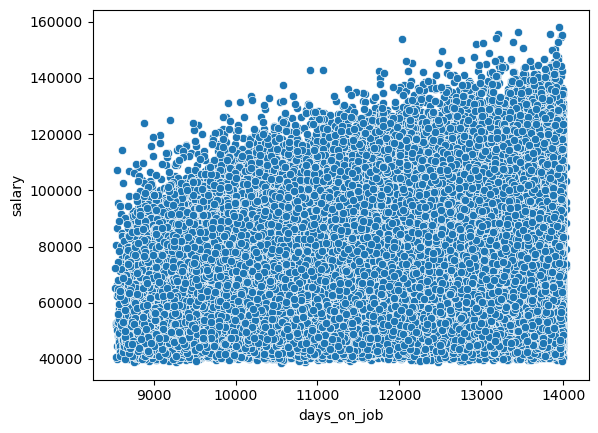

In [70]:


sns.scatterplot(x="days_on_job", y="salary", data=df_emp)



In [78]:
r, p = stats.pearsonr(df_emp.days_on_job, df_emp.salary)
r,p

(0.3064625613186014, 0.0)

b. relationship between time with company and number of titles held? Ho: no

In [80]:
url = get_db_url('employees')



df_emp2 = pd.read_sql("""
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
""", url)



alpha = 0.05


In [81]:
r, p = stats.pearsonr(df_emp2.days_on_job, df_emp2.title_count)
r,p

(0.2665989299134097, 0.0)

4. use sleepstudy data

In [41]:
from pydataset import data
df_sleep = data('sleepstudy')
df_sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


a. relationship between days and reaction time? Ho: no

<function matplotlib.pyplot.show(close=None, block=None)>

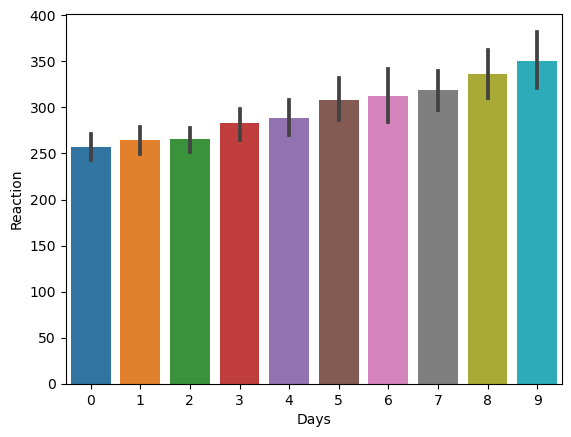

In [48]:
sns.barplot(data=df_sleep, x ='Days', y='Reaction')
plt.show

In [49]:
r, p = stats.pearsonr(df_sleep.Days, df_sleep.Reaction)
r,p

(0.5352302262650255, 9.89409632221439e-15)

## Comparison of Groups

1. Which type of stats test would you use here?

a. Do students with rubber ducks on their desks get better grades? 

1 tailed 1 sample t test

b. Does smoking affect whether or not someone gets lung cancer?

Chi square

c. Is gender independent of blood type? 

Chi Square

d. Has new fertilizer improved crop yield?

1 tailed 2 sample t test

e. Does length of lecture correlate with student grade?

Pearson's R

f. Do people with dogs vs people with cats live in apartments at a higher rate? 

chi square

2. Look at contingency table. Are using a macbook and being a codeup student independent of each other?

Ho: no relationship Ha: Relationship Conclusion: There is likely a relationship between being a codeup student and using a macbook according to this dataset

3. use mpg dataset and choose 2 categorical variables. do Chi square test on them State Ho and Ha

Ho: manufacter is not related to class of vehicle Ha: manufacture is related to class of vehicle. We reject the null hypothesis p<alpha

In [64]:
from pydataset import data
mpg_df = data('mpg')
mpg_df.head()
alpha = .05



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [85]:
observed = pd.crosstab(mpg_df['class'], mpg_df.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [86]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(464.37214690582,
 5.267718408816259e-54,
 84,
 array([[0.38461538, 0.40598291, 0.79059829, 0.53418803, 0.19230769,
         0.2991453 , 0.17094017, 0.08547009, 0.06410256, 0.08547009,
         0.27777778, 0.10683761, 0.2991453 , 0.72649573, 0.57692308],
        [3.61538462, 3.81623932, 7.43162393, 5.02136752, 1.80769231,
         2.81196581, 1.60683761, 0.8034188 , 0.6025641 , 0.8034188 ,
         2.61111111, 1.0042735 , 2.81196581, 6.82905983, 5.42307692],
        [3.15384615, 3.32905983, 6.48290598, 4.38034188, 1.57692308,
         2.45299145, 1.4017094 , 0.7008547 , 0.52564103, 0.7008547 ,
         2.27777778, 0.87606838, 2.45299145, 5.95726496, 4.73076923],
        [0.84615385, 0.89316239, 1.73931624, 1.17521368, 0.42307692,
         0.65811966, 0.37606838, 0.18803419, 0.14102564, 0.18803419,
         0.61111111, 0.23504274, 0.65811966, 1.5982906 , 1.26923077],
        [2.53846154, 2.67948718, 5.21794872, 3.52564103, 1.26923077,
         1.97435897, 1.12820513, 0.56410256, 0.42307

4. Use employees database

In [87]:
from env import get_db_url

url = get_db_url('employees')





a. Is gender independent of whether a person works in sales and marketing? Only use current employees. Fail to reject Ho

In [102]:
df_gender = pd.read_sql('''
SELECT * FROM dept_emp
JOIN employees ON dept_emp.emp_no = employees.emp_no
JOIN departments ON dept_emp.dept_no = departments.dept_no
JOIN salaries ON salaries.emp_no = dept_emp.emp_no
WHERE salaries.to_date > curdate()
AND dept_name IN ('Sales', 'Marketing');

''', url)

df_gender.head()

,emp_no,dept_no,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,dept_name,emp_no,salary,from_date,to_date
0,10017,d001,1993-08-03,9999-01-01,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,d001,Marketing,10017,99651,2002-08-01,9999-01-01
1,10058,d001,1988-04-25,9999-01-01,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,d001,Marketing,10058,72542,2002-04-22,9999-01-01
2,10140,d001,1991-03-14,9999-01-01,10140,1957-03-11,Yucel,Auria,F,1991-03-14,d001,Marketing,10140,76604,2002-03-11,9999-01-01
3,10228,d001,1993-01-28,9999-01-01,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,d001,Marketing,10228,96062,2001-12-20,9999-01-01
4,10239,d001,1996-05-04,9999-01-01,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,d001,Marketing,10239,82905,2002-05-03,9999-01-01


In [103]:
observed = pd.crosstab(df_gender.gender, df_gender.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,6429,16698
M,9823,25302


In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.18548924445258216,
 0.6666977011651685,
 1,
 array([[ 6452.31071895, 16674.68928105],
        [ 9799.68928105, 25325.31071895]]))

b. is gender independent of whether or not they are a manager?